In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import linearRegression_1
import math
import random
%matplotlib notebook


In [2]:
# create artificial data
n = 100
x=np.random.rand(n)
# We want to guess the slope + intercept of the line of equation y=a*x+b
a=2.
b=1.
y = a*x + b + np.random.randn(n)*0.1

<IPython.core.display.Javascript object>


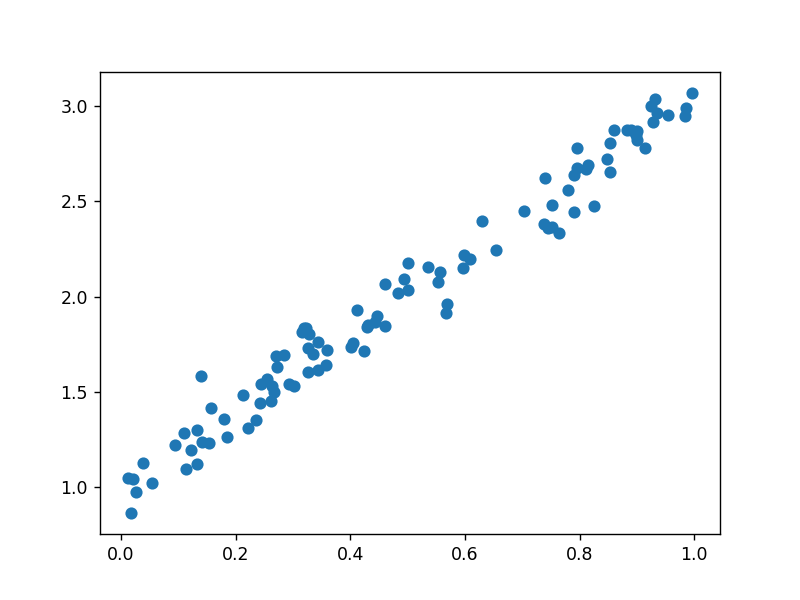

In [3]:
plt.figure()
plt.scatter(x,y)

In [4]:
sol=minimize(fun=linearRegression_1.mycost,x0=np.array([10,10]),args=(x,y,2),method='Nelder-Mead')
print(sol)

 final_simplex: (array([[2.0423491 , 0.99126148],
       [2.04238208, 0.99123141],
       [2.04226367, 0.9912829 ]]), array([1.00206267, 1.00206267, 1.00206269]))
           fun: 1.002062667019337
       message: 'Optimization terminated successfully.'
          nfev: 104
           nit: 54
        status: 0
       success: True
             x: array([2.0423491 , 0.99126148])


<IPython.core.display.Javascript object>


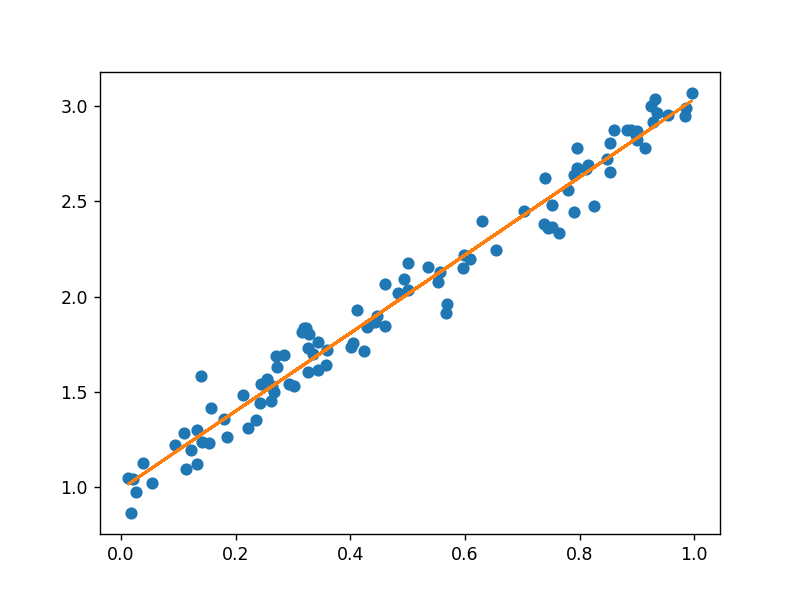

In [5]:
plt.figure()
a_estimated=sol.x[0]
b_estimated=sol.x[1]
y_predicted=a_estimated*x + b_estimated
plt.plot(x,y,'o',x,y_predicted)

In [6]:
x2 = np.array(list(x))
y2 = np.array(list(y))
# plt.figure()
slopes = []
intercepts = []

iters = 1000

for i in range(iters):
    pop = np.random.randint(0,len(x) , size=math.ceil(len(x2)/10))
    x3 = np.delete(x2, pop)
    y3 = np.delete(y2, pop)
    add = np.random.randint(0, len(x3), size = len(x2)-len(x3))
    
    x3 = np.append(x3, x3[add])
    y3 = np.append(y3, y3[add])
    
    sol = minimize(fun=linearRegression_1.mycost,x0=np.array([10,10]),
                   args=(x3,y3,2),method='Nelder-Mead')
    
    slopes.append(sol.x[0])
    intercepts.append(sol.x[1])
    
    # plt.subplot(121)
    # plt.hist(x3, color='black', alpha=0.1)
    # plt.scatter(i, np.nanmean(x3))
    # plt.subplot(122)
    # plt.hist(y3, color='black', alpha=0.1)
    # plt.scatter(i, np.nanmean(y3))

print(np.mean(y3 - y),
np.mean(x3 - x))
#plt.figure()
#plt.plot(x3,y3, '.')
#plt.plot(x,y, '.')

-0.017948618198017217 -0.010481221253410854


Même après plusieurs étapes de sampling, les données sont trés proches. 

<IPython.core.display.Javascript object>


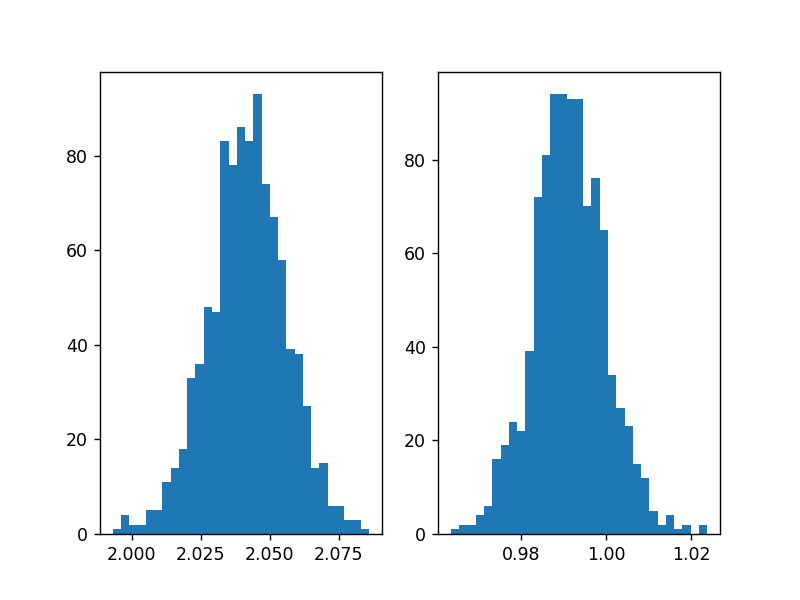

Slope standard deviation: 0.014
Intercept standard deviation: 0.008


In [7]:
plt.figure()
plt.subplot(121)
plt.hist(slopes, bins=int(np.sqrt(iters)))
plt.subplot(122)
plt.hist(intercepts, bins=int(np.sqrt(iters)))

print('Slope standard deviation: %.3f' % np.std(slopes))
print('Intercept standard deviation: %.3f' % np.std(intercepts))